# Cognitive Neuroscience: Group Project

## Worksheet 0 - Working with NumPy matrices & MatPlotLib

Marijn van Wingerden, Department of Cognitive Science and Artificial Intelligence – Tilburg University Academic Year 21-22

Welcome to the group project! In this Worksheet, we start off with a short introduction to the NumPy package in Python that will be used in this analysis.

Considering the dataset at hand, an EEG recording, we are dealing with multiple signals recorded at the same time from different spatial locations (the electrodes) and over time (yielding a timeseries of continuous recording with a certain sampling rate). In addition, data can be combined over participants or over trial numbers (repetitions of the same behavioral events). 

- These data will be stored initially as 3D arrays (nParticipants/nEvents x nSites x nTime)
- Numpy by itself does not care about the *ordering* of the dimensions, but for your own sake, this might be useful. We will come back to this in later worksheets

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example

This is the example from the Lab 0 introduction presentation. Don't worry if you do not yet understand it completely.
- plt refers to functions related to matplotlib.pyplot
- np refers to functions from NumPy

[0.         0.01259155 0.02518311 0.03777466 0.05036621]
[6.23281909 6.24541065 6.2580022  6.27059375 6.28318531]


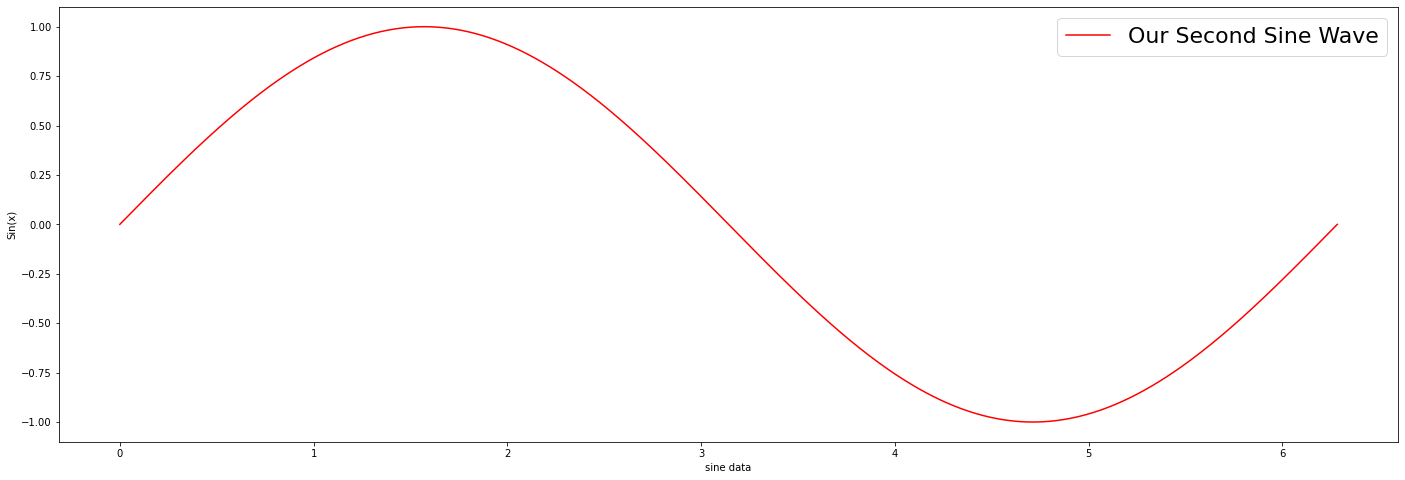

In [2]:
fig, ax = plt.subplots(figsize=(24,8)) #starts a basic figure

# we ask for a 1D array with 500 lineary spaced values from 0 to 2pi
sine_data = np.linspace(start= 0, stop= 2*np.pi, num=500) 
print(sine_data[0:5])
print(sine_data[-5:])

plt.rcParams.update({'font.size': 22}) # we want stuff to be visible

ax.plot(sine_data,np.sin(sine_data), 'r', label = "Our Second Sine Wave")
ax.set_xlabel("sine data") # add a label to the x-axis
ax.set_ylabel("Sin(x)") # add a label to the y-axis
ax.legend() # show the legend ("label")
plt.show() # shows the plot inline


### Arrays
When we are working with EEG data, it is common to find the data in raw format stored in an array, with a separate index variable for the time axis. Let's quickly review some basic array functions using NumPy:

In [3]:
import numpy as np

#create a basic random array (2 rows, 4 columns)
# randn generates a random number from the normal distribution (mean = 0, sd = 1)
mat = np.random.randn(2,4)
mat

array([[-0.9319228 ,  1.54054973, -1.48582077,  1.56070248],
       [ 1.19333857, -0.78892086,  0.96953659, -0.01877265]])

In [4]:
# we will usually want to store values in Float arrays (allowing non-integer values)
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], dtype='float')
print("type of 'a' is", a.dtype)
a

type of 'a' is float64


array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

### Array functions in NumPy

If you imagine a cube (a 3D data structure), it is possible to apply operations across all three axes. Such operations include:
- np.sum
- np.max
- np.min
- np.mean
- np.median

In [5]:
# without specification, Numpy takes the across the entire matrix
print("max:",np.max(a))
print("mean:",np.mean(a))

max: 12.0
mean: 6.5


What has happened in the cell above? Rather than getting a max or mean for each row or column, NumPy has just returned 1 value. This is because NumPy by default *flattens* the array and takes the max/min/mean across **all values**. If you want an operation to return a value across each row, column, etc., you have to specify the *axis* along which you want this to happen. 

In [6]:
# axis 0 = across rows, e.g. inside each column. result has shape nCols
np.mean(a, axis=0)

array([5.5, 6.5, 7.5])

In [7]:
# axis 1 = across columns, e.g. inside each row. results has shape nRows
np.mean(a, axis=1)

array([ 2.,  5.,  8., 11.])

In [8]:
# we can shift the entire matrix by adding a constant
a + 1 

array([[ 2.,  3.,  4.],
       [ 5.,  6.,  7.],
       [ 8.,  9., 10.],
       [11., 12., 13.]])

In [9]:
# similarly, we could center the matrix by subtracting its average. The sum of the matrix should then be 0
print(a - np.mean(a))
print("sum of a is:", np.sum(a - np.mean(a)))

[[-5.5 -4.5 -3.5]
 [-2.5 -1.5 -0.5]
 [ 0.5  1.5  2.5]
 [ 3.5  4.5  5.5]]
sum of a is: 0.0


In [10]:
# we can get out the dimensions of the matrix using shape
print("shape of a:", a.shape)
print("the shape method returns a:", type(a.shape))


shape of a: (4, 3)
the shape method returns a: <class 'tuple'>


We can use Row X Column indexing to extract a single number:

In [11]:
# 2nd row, 3rd column - remember that Python starts at 0
a[1,2]

6.0

using np.arange, we can take a subsample of the matrix, for example every other value:

In [12]:
subsample_index = np.arange(start = 0, stop = a.shape[0], step = 2)
print(subsample_index)

# subsample on the rows, for all columns (:)
a_sub = a[subsample_index,:]
print(a_sub)

[0 2]
[[1. 2. 3.]
 [7. 8. 9.]]


We can use isnan and np.nan to check for and assign _not a number_ placeholders for missing data:

In [13]:
a[1,2] = np.nan
print(a)
print("NaN check: ", np.isnan(a),sep="\n")

[[ 1.  2.  3.]
 [ 4.  5. nan]
 [ 7.  8.  9.]
 [10. 11. 12.]]
NaN check: 
[[False False False]
 [False False  True]
 [False False False]
 [False False False]]


Using np.zeros, we can set up an empty matrix. Pay attention that the argument for size needs to be a tuple, so therefore we see double parentheses. When creating a 1D sequence, np.arange can be used. For _arange_, the start argument is optional (defaults to 0), and only the end needs to be supplied.


In [14]:
# let's start with an empty array of 4 rows by 3 columns
tmp = np.zeros((4,3))
print("tmp: ",tmp, sep = "\n")

# suppose that this is a matrix where we want to place some data later. 
# we want to use a different variable as an index (samples, or time) into this matrix
# therefore, it needs a number of of repetitions equal to the rows

# we start by storing the shape:
array_shape = a.shape
print("shape:", array_shape)

# next, we define a range (it starts from 0 if we do not specify more arguments)
# it should run up to the number of rows in the array
tmp_1D = np.arange(array_shape[0])
print("tmp_1D: ",tmp_1D)

# the default way of storing a 1D array is as a 1-column vector (here, with 4 rows).
print("shape of 1D:", tmp_1D.shape)


tmp: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
shape: (4, 3)
tmp_1D:  [0 1 2 3]
shape of 1D: (4,)


### generating and storing random numbers

In the following cell, we will generate random numbers from the normal distribution and store them in an array and calculate its mean and standard deviation. We start by *pre-allocating* the array for the expected shape. Why?
- to make sure that the we think ahead about the shape of our data
- to make sure that the data we generate indeed matches this expectation
    - to save memory: .append() creates a copy of the array and thus uses more memory

In [15]:
# we start by pre-allocating a 1D array for 500 samples

our_array = np.zeros(500) # for 1D, you can directly specify the size with an int
our_array2 = np.zeros((500,1)) # remember, a tuple also works but creates a 2D with col=1
print("ex1:", our_array.shape)
print("ex2:", our_array2.shape)

rand_signal = np.random.randn(500)
rand_signal2 = np.random.randn(500,1)
print("sig1:", rand_signal.shape)
print("sig2:", rand_signal2.shape)

# rather than overwriting the variable, we fill the array elements with rand_signal
our_array[0:len(rand_signal)] = rand_signal
print(our_array[:2], our_array[-2:])

ex1: (500,)
ex2: (500, 1)
sig1: (500,)
sig2: (500, 1)
[-0.25055356 -0.2545516 ] [-0.66092553  0.60566077]


## Exercises 

Exercise 1: 
- create a 10 row by 5 columns float array filled with zeros, named blank_array
- add 5 to all values in blank_array
- change the 7th row, 2nd column to a NaN
- subset the 3rd column with the numbers 0:9
- subset the 6th row with a sequence starting at 4 and incrementing by 4 each step
- use linspace to fill the 9th row with 5 numbers evenly spaced between (and including) 100 and 200
- calculate the column means, **including** NaNs (check the numpy documentation: https://numpy.org/doc/stable/contents.html)
- calculate the row means, **excluding** NaNs



In [16]:
##
## Your answer here
## 

blank_array = np.zeros((10,5), dtype = 'float64')
blank_array = blank_array + 5
blank_array[6,1] = np.nan

blank_array[:,2] = np.arange(10)
blank_array[5,:] = np.arange(start = 4, stop = 21, step = 4)
blank_array[8,:] = np.linspace(start = 100, stop = 200, num = 5)

col_means = np.mean(blank_array,0)
print("col mean  including NaNs: ", col_means)
row_means = np.nanmean(blank_array,1)
print("row mean  excluding NaNs: ", row_means)

blank_array

col mean  including NaNs:  [14.4  nan 19.4 23.1 26. ]
row mean  excluding NaNs:  [  4.     4.2    4.4    4.6    4.8   12.     5.25   5.4  150.     5.8 ]


array([[  5.,   5.,   0.,   5.,   5.],
       [  5.,   5.,   1.,   5.,   5.],
       [  5.,   5.,   2.,   5.,   5.],
       [  5.,   5.,   3.,   5.,   5.],
       [  5.,   5.,   4.,   5.,   5.],
       [  4.,   8.,  12.,  16.,  20.],
       [  5.,  nan,   6.,   5.,   5.],
       [  5.,   5.,   7.,   5.,   5.],
       [100., 125., 150., 175., 200.],
       [  5.,   5.,   9.,   5.,   5.]])

Exercise 2:

In the following, use np.random.randn to generate random, Gaussian (i.e. from the normal distribution) noise. Imagine this as an EEG electrode that is not properly attached to the skull and thus measuring air. Let's assume that the electrode records a signal sample every 10 milliseconds (10 ms = 0.01s). Assume that the array should have a 10-sample period with only zeros before the signal actually starts. This means time should start at -0.1s, and the actual signal will start at 0s

Take the following steps
- pre-allocate the 1D array with 10+100 zeros
- generate a (time)series of 100 random values
- store these values in the array from the 10th sample onward
- define a time axis that holds a value in seconds for each sample (spaced 10 ms)
    - use np.arange cleverly
- start a matplotlib plot
- plot the random timeseries against its time axis (time should go on the x-axis)
    - add an appropriate label
- specify the x-axis and y-axis labels
- plot!
    - include the legend
    - prettify as much as you want

[ 0.          0.          0.          0.          0.         -0.17679693
 -0.21440903 -1.14007523  0.42731844  0.11096083]
[ 0.06760051 -0.25586069 -1.24786905  1.30293426  0.23064046]
check: length of time_index: (110,)


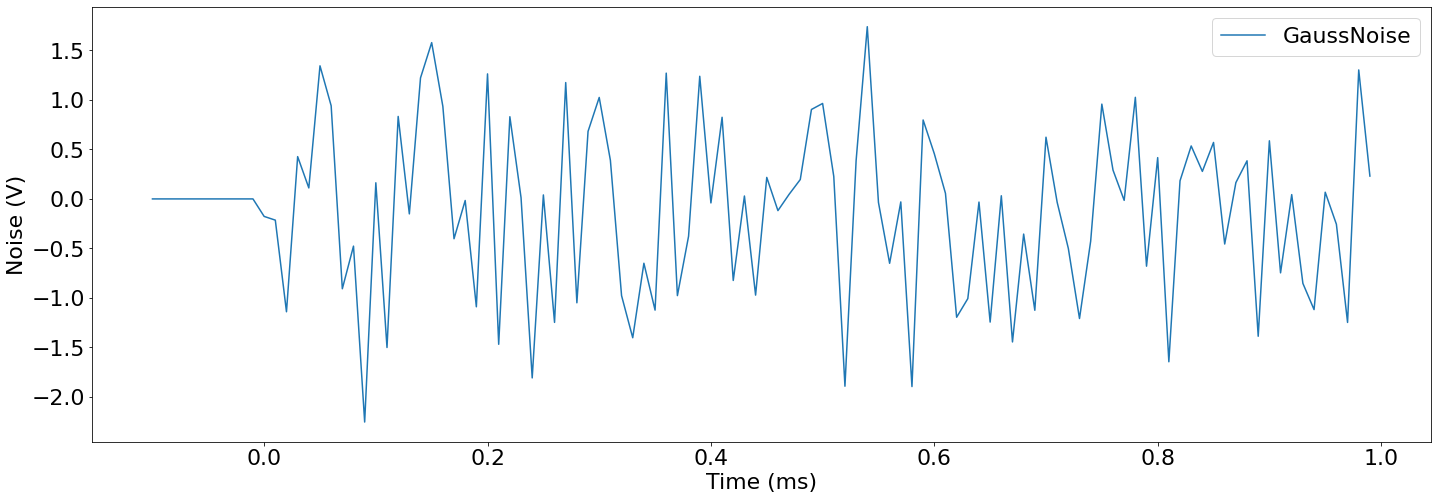

In [17]:
##
## Your answer here
## 

rand_timeseries = np.random.randn(100)
plot_array = np.zeros(10+100)
plot_array[10:] = rand_timeseries

# check: print some of the 0 baseline, some of the signal and the last values
# this shows that the array is filled up correctly.
print(plot_array[5:15], plot_array[-5:], sep = "\n")

time_index = np.arange(start = -0.1, stop = 1, step = 0.01)
print("check: length of time_index:", time_index.shape)

# the plotting stuff
fig, ax = plt.subplots(figsize = (24,8))
ax.plot(time_index, plot_array, label = "GaussNoise")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Noise (V)")
plt.legend()
plt.show()


This concludes the exercises for Lab 0